In [6]:
import librosa 
import librosa.display
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from tensorflow import keras 
from tensorflow.keras.preprocessing import image_dataset_from_directory, image 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
path = Path.cwd()/'data'
answers = pd.read_csv('answers.csv')
images_directory = path/'train_images'

In [5]:
cb_training = image_dataset_from_directory(images_directory, labels='inferred', image_size=(64,64), subset='training', validation_split=.2, seed=10)
cb_validation = image_dataset_from_directory(images_directory, labels='inferred', image_size=(64,64), subset='validation', validation_split=.2, seed=10)

Found 30000 files belonging to 2 classes.
Using 24000 files for training.


2022-03-14 12:35:44.941697: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 30000 files belonging to 2 classes.
Using 6000 files for validation.


In [14]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(64,64, 3)))
cnn.add(Conv2D(filters=5, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
cnn.add(GlobalAveragePooling2D())

cnn.add(layers.Dense(20, activation='relu'))
cnn.add(layers.Dense(100, activation='relu'))
cnn.add(layers.Dense(100, activation='relu'))

cnn.add(layers.Dense(1, activation='sigmoid'))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 5)         140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 5)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 10)        460       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 20)        1820      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 30)         

In [15]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = cnn.fit(cb_training, epochs=2,validation_data=cb_validation)

Epoch 1/2
750/750 [==============================] - 31s 40ms/step - loss: 0.3122 - accuracy: 0.8557 - val_loss: 0.2425 - val_accuracy: 0.8907
Epoch 2/2
750/750 [==============================] - 30s 40ms/step - loss: 0.2296 - accuracy: 0.8976 - val_loss: 0.2203 - val_accuracy: 0.8975


In [20]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
class_weight = {0: .5, 1:1}
history = cnn.fit(cb_training, epochs=10,validation_data=cb_validation, class_weight = class_weight)

Epoch 1/10
750/750 [==============================] - 37s 48ms/step - loss: 0.1411 - accuracy: 0.8993 - val_loss: 0.2202 - val_accuracy: 0.8998
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 0.1362 - accuracy: 0.9042 - val_loss: 0.2492 - val_accuracy: 0.8842
Epoch 3/10
750/750 [==============================] - 29s 39ms/step - loss: 0.1301 - accuracy: 0.9086 - val_loss: 0.2188 - val_accuracy: 0.8987
Epoch 4/10
750/750 [==============================] - 30s 40ms/step - loss: 0.1264 - accuracy: 0.9109 - val_loss: 0.2214 - val_accuracy: 0.8985
Epoch 5/10
750/750 [==============================] - 29s 39ms/step - loss: 0.1235 - accuracy: 0.9130 - val_loss: 0.2091 - val_accuracy: 0.9070
Epoch 6/10
750/750 [==============================] - 27s 36ms/step - loss: 0.1215 - accuracy: 0.9148 - val_loss: 0.2210 - val_accuracy: 0.8962
Epoch 7/10
750/750 [==============================] - 34s 46ms/step - loss: 0.1185 - accuracy: 0.9168 - val_loss: 0.2161 - val_accuracy:

In [23]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 750}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
class_weight = {0: .5, 1:1}


In [27]:
history = cnn.fit(cb_training, epochs=50,validation_data=cb_validation, class_weight = class_weight, callbacks=[keras.callbacks.ModelCheckpoint('models/whalescnn1.{epoch:02d}-{val_loss:.2f}.hdf5')])

Epoch 1/50
750/750 [==============================] - 38s 47ms/step - loss: 0.1075 - tp: 5201.0000 - fp: 1342.0000 - tn: 17030.0000 - fn: 427.0000 - accuracy: 0.9263 - precision: 0.7949 - recall: 0.9241 - auc: 0.9790 - prc: 0.9294 - val_loss: 0.2400 - val_tp: 1282.0000 - val_fp: 505.0000 - val_tn: 4096.0000 - val_fn: 117.0000 - val_accuracy: 0.8963 - val_precision: 0.7174 - val_recall: 0.9164 - val_auc: 0.9654 - val_prc: 0.8937
Epoch 2/50
750/750 [==============================] - 34s 46ms/step - loss: 0.1047 - tp: 5217.0000 - fp: 1287.0000 - tn: 17085.0000 - fn: 411.0000 - accuracy: 0.9293 - precision: 0.8021 - recall: 0.9270 - auc: 0.9802 - prc: 0.9331 - val_loss: 0.2090 - val_tp: 1211.0000 - val_fp: 368.0000 - val_tn: 4233.0000 - val_fn: 188.0000 - val_accuracy: 0.9073 - val_precision: 0.7669 - val_recall: 0.8656 - val_auc: 0.9651 - val_prc: 0.8896
Epoch 3/50
750/750 [==============================] - 32s 43ms/step - loss: 0.1028 - tp: 5250.0000 - fp: 1288.0000 - tn: 17084.0000 - fn

Epoch 20/50
750/750 [==============================] - 33s 44ms/step - loss: 0.0648 - tp: 5445.0000 - fp: 825.0000 - tn: 17547.0000 - fn: 183.0000 - accuracy: 0.9580 - precision: 0.8684 - recall: 0.9675 - auc: 0.9914 - prc: 0.9691 - val_loss: 0.2979 - val_tp: 1184.0000 - val_fp: 371.0000 - val_tn: 4230.0000 - val_fn: 215.0000 - val_accuracy: 0.9023 - val_precision: 0.7614 - val_recall: 0.8463 - val_auc: 0.9478 - val_prc: 0.8581
Epoch 21/50
750/750 [==============================] - 32s 43ms/step - loss: 0.0638 - tp: 5443.0000 - fp: 802.0000 - tn: 17570.0000 - fn: 185.0000 - accuracy: 0.9589 - precision: 0.8716 - recall: 0.9671 - auc: 0.9918 - prc: 0.9697 - val_loss: 0.3122 - val_tp: 1289.0000 - val_fp: 536.0000 - val_tn: 4065.0000 - val_fn: 110.0000 - val_accuracy: 0.8923 - val_precision: 0.7063 - val_recall: 0.9214 - val_auc: 0.9580 - val_prc: 0.8623
Epoch 22/50
750/750 [==============================] - 32s 43ms/step - loss: 0.0616 - tp: 5422.0000 - fp: 762.0000 - tn: 17610.0000 - fn

Epoch 39/50
750/750 [==============================] - 31s 41ms/step - loss: 0.0398 - tp: 5507.0000 - fp: 464.0000 - tn: 17908.0000 - fn: 121.0000 - accuracy: 0.9756 - precision: 0.9223 - recall: 0.9785 - auc: 0.9966 - prc: 0.9868 - val_loss: 0.4237 - val_tp: 1181.0000 - val_fp: 363.0000 - val_tn: 4238.0000 - val_fn: 218.0000 - val_accuracy: 0.9032 - val_precision: 0.7649 - val_recall: 0.8442 - val_auc: 0.9407 - val_prc: 0.8441
Epoch 40/50
750/750 [==============================] - 31s 41ms/step - loss: 0.0389 - tp: 5515.0000 - fp: 478.0000 - tn: 17894.0000 - fn: 113.0000 - accuracy: 0.9754 - precision: 0.9202 - recall: 0.9799 - auc: 0.9967 - prc: 0.9883 - val_loss: 0.4179 - val_tp: 1168.0000 - val_fp: 363.0000 - val_tn: 4238.0000 - val_fn: 231.0000 - val_accuracy: 0.9010 - val_precision: 0.7629 - val_recall: 0.8349 - val_auc: 0.9344 - val_prc: 0.8224
Epoch 41/50
750/750 [==============================] - 31s 42ms/step - loss: 0.0374 - tp: 5513.0000 - fp: 436.0000 - tn: 17936.0000 - fn

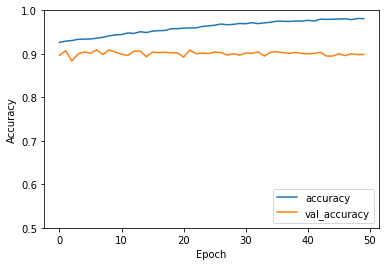

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#Val accuracy hovering around .9, not increasing 

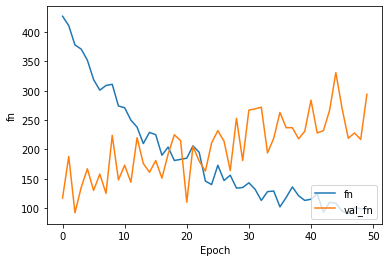

In [34]:
plt.plot(history.history['fn'], label='fn')
plt.plot(history.history['val_fn'], label = 'val_fn')
plt.xlabel('Epoch')
plt.ylabel('fn')
plt.legend(loc='lower right')
#False negatives for validation are continuously increasing, even as training is decreasing - we're overfitting

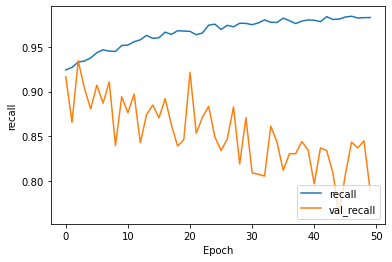

In [35]:
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.legend(loc='lower right')
#Recall is getting worse continuously. 

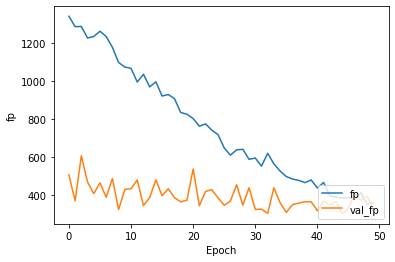

In [36]:
plt.plot(history.history['fp'], label='fp')
plt.plot(history.history['val_fp'], label = 'val_fp')
plt.xlabel('Epoch')
plt.ylabel('fp')
plt.legend(loc='lower right')
#False positive is getting a bit lower, but not as quickly as the test test - that makes sense -
#There are fewer entries in validation. 
#Lets check precision

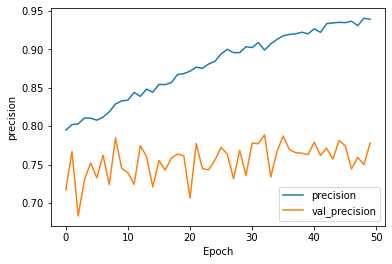

In [37]:
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend(loc='lower right')
#Precision is staying pretty constant for validation. 


# summary so far
## Overfitting 
So, we're grossly overfitting. That is a problem.   
The false negatives for validation are going up, and recall is going down, continuously.  
## What that means for our problem
For our problem, the false negatives and recall are most important- missing a whale means we might hurt it - since there are only 400 of them in the world, thats a massive problem.  
On the other hand, a false positive means ships in the area slow down without a whale being present. This is still pretty important - too many, and shipping will complain, or ignore requests to slow down.  